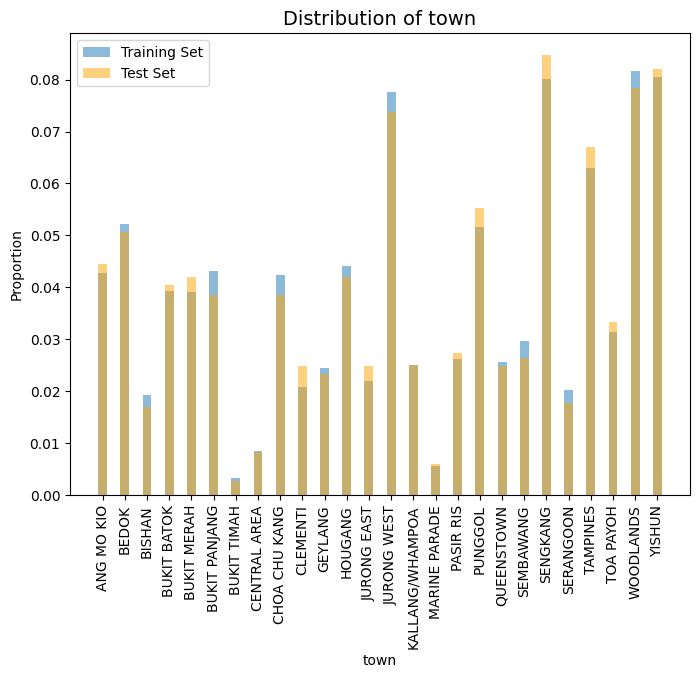

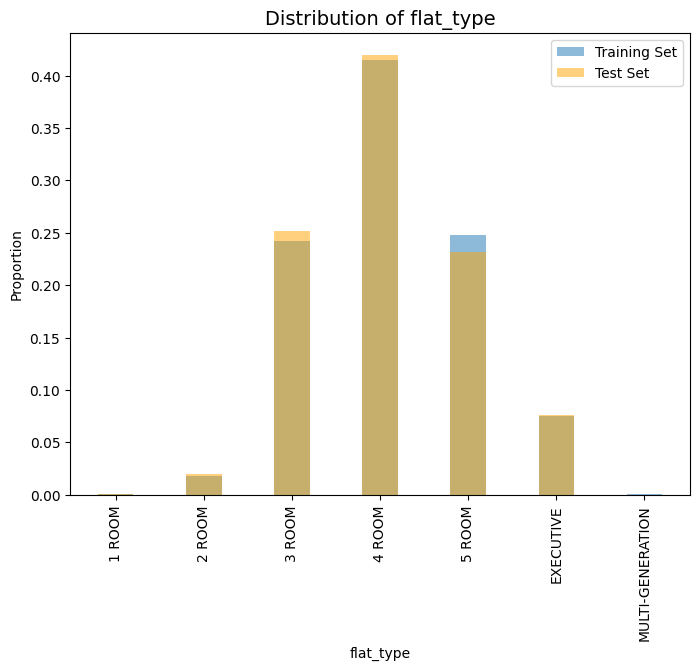

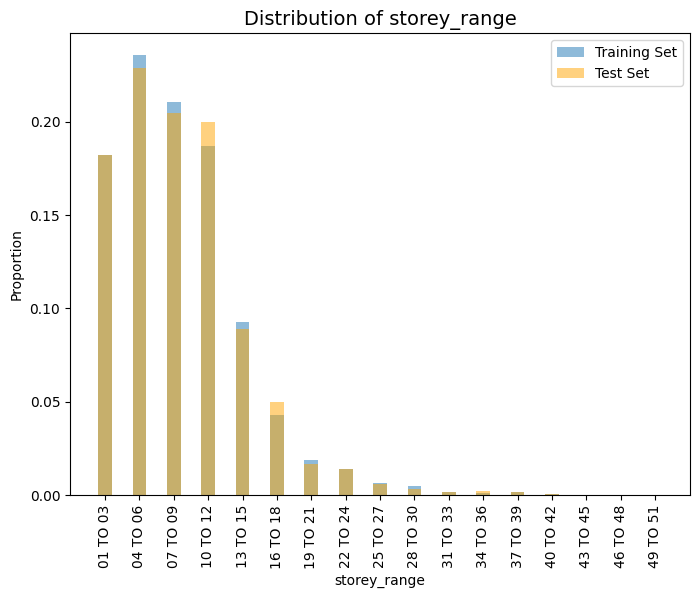

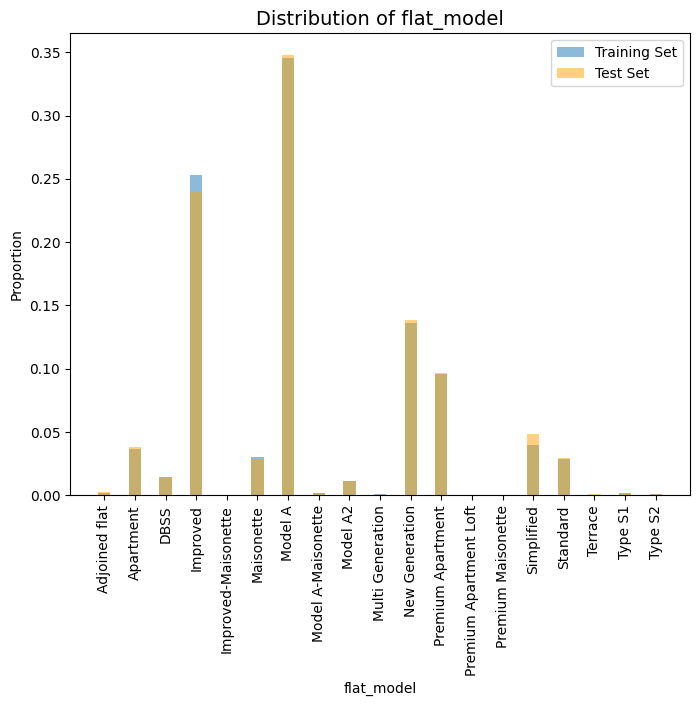

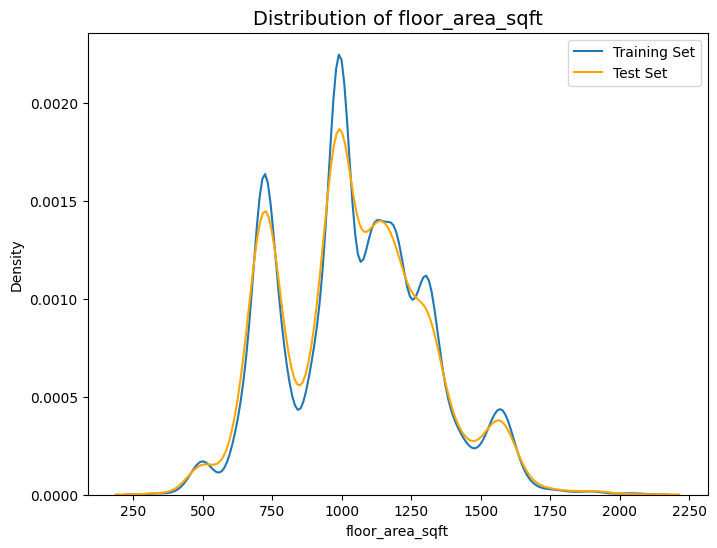

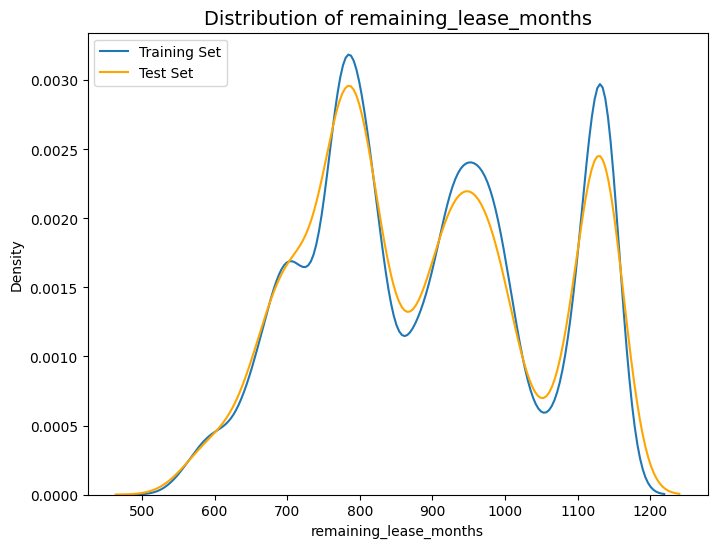

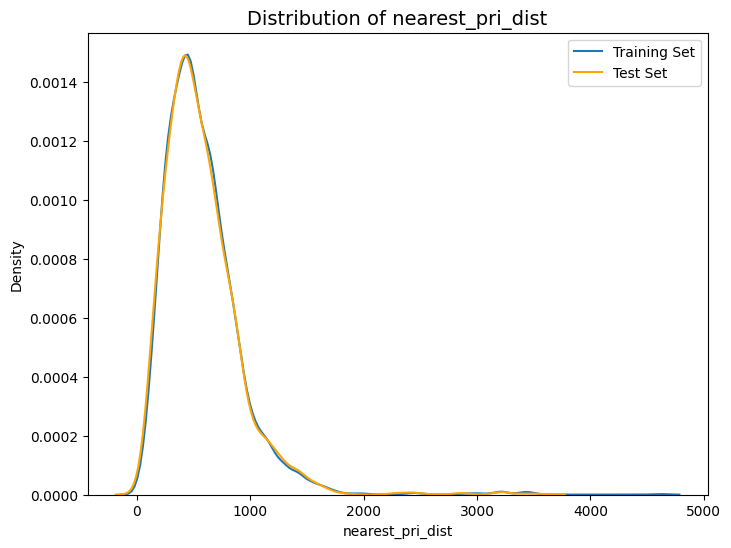

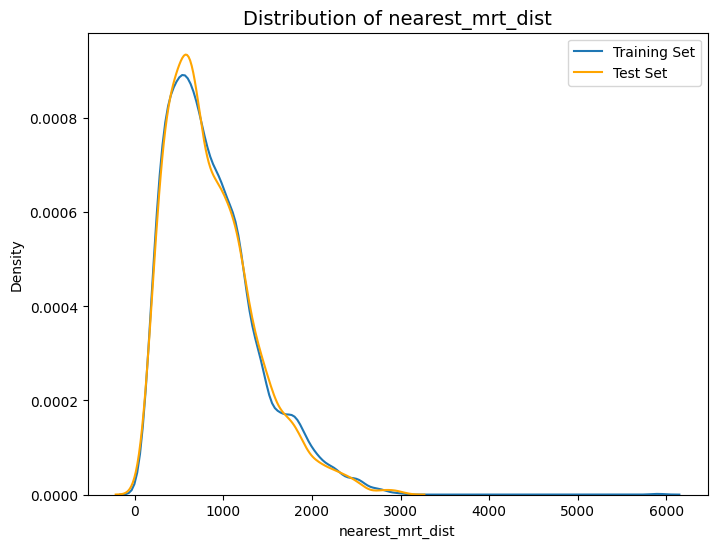

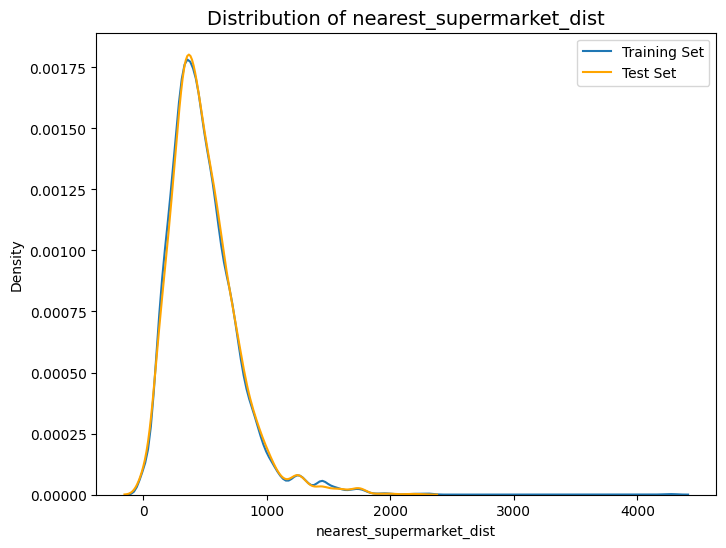

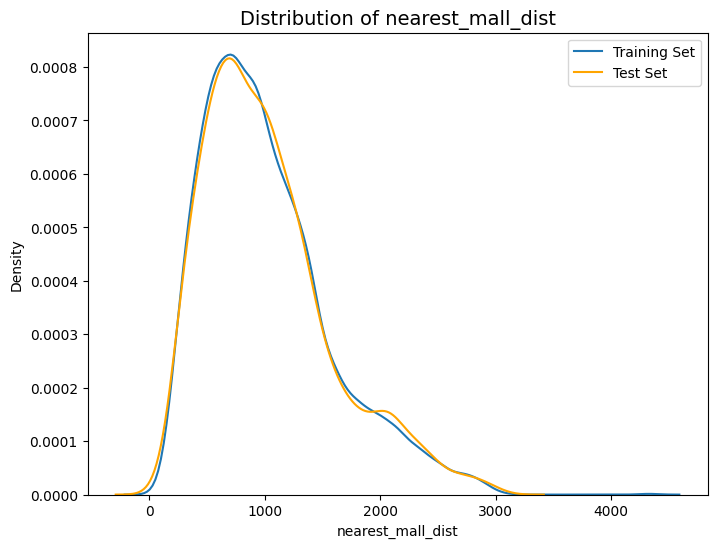

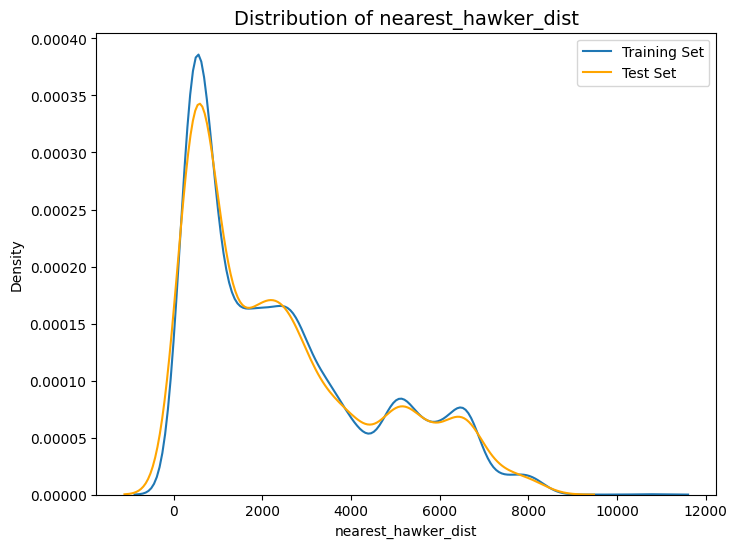

KL Divergence for Numerical Features:
floor_area_sqft: 0.004107968295853008
remaining_lease_months: 0.02723938405980809
nearest_pri_dist: 0.0012236792225853257
nearest_mrt_dist: 0.0008880725129158142
nearest_supermarket_dist: 0.0010465435178217005
nearest_mall_dist: 0.0010012686907633944
nearest_hawker_dist: 0.0018727990154203313
KL Divergence for Target Variable (price_per_sqft): 0.0031661955413586464


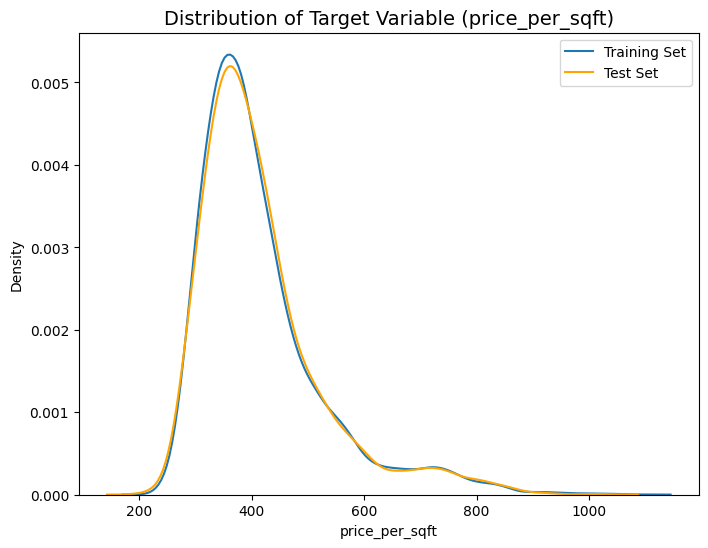

In [28]:
# Random Split Code (default)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

# Load your dataset
df = pd.read_csv('resale_flat_prices.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['price_per_sqft'])
y = df['price_per_sqft']

# Split the dataset into 80% training and 20% test without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Visualize categorical feature distributions
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    
    # Get value counts for training and test sets, aligning categories
    train_counts = X_train[col].value_counts(normalize=True).sort_index()
    test_counts = X_test[col].value_counts(normalize=True).sort_index()
    
    combined_index = train_counts.index.union(test_counts.index)
    train_counts = train_counts.reindex(combined_index, fill_value=0)
    test_counts = test_counts.reindex(combined_index, fill_value=0)
    
    width = 0.4  # Width for the bars

    # Plot the bars for training and test sets
    plt.bar(train_counts.index, train_counts, width=width, alpha=0.5, label='Training Set')
    plt.bar(test_counts.index, test_counts, width=width, alpha=0.5, label='Test Set', color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.show()

# Function to calculate KL divergence
def calculate_kl_divergence(pdf_train, pdf_test, epsilon=1e-10):
    """Calculates KL divergence with smoothing to avoid division by zero."""
    pdf_train = np.maximum(pdf_train, epsilon)  # Add a small value to avoid zero
    pdf_test = np.maximum(pdf_test, epsilon)   # Add a small value to avoid zero
    kl_divergence = np.sum(pdf_train * np.log(pdf_train / pdf_test))
    return kl_divergence

# Visualize numerical feature distributions using KDE plots and calculate KL divergence
numerical_features = X_train.select_dtypes(include=['number']).columns
kl_divergences = {}

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    
    # Plot KDE for training and test sets
    sns.kdeplot(X_train[col], label='Training Set', fill=False)
    sns.kdeplot(X_test[col], label='Test Set', fill=False, color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    
    # Estimate PDF using KDE for y_train and y_test
    kde_train = gaussian_kde(X_train[col])
    kde_test = gaussian_kde(X_test[col])

    # Define the range of values for the PDF
    x_values = np.linspace(min(X_train[col].min(), X_test[col].min()), max(X_train[col].max(), X_test[col].max()), 1000)

    # Evaluate PDF at the defined points
    pdf_train = kde_train(x_values)
    pdf_test = kde_test(x_values)
    
    # Calculate KL divergence
    kl_divergence = calculate_kl_divergence(pdf_train, pdf_test)
    kl_divergences[col] = kl_divergence

# Report KL divergence values
print("KL Divergence for Numerical Features:")
for feature, kl_value in kl_divergences.items():
    print(f"{feature}: {kl_value}")


# Estimate PDF using KDE for target variable y_train and y_test
kde_train_y = gaussian_kde(y_train)
kde_test_y = gaussian_kde(y_test)

# Evaluate PDF at the defined points for target variable
x_values_y = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 1000)
pdf_train_y = kde_train_y(x_values_y)
pdf_test_y = kde_test_y(x_values_y)

# Calculate KL divergence for target variable
kl_divergence_y = calculate_kl_divergence(pdf_train_y, pdf_test_y)
print("KL Divergence for Target Variable (price_per_sqft):", kl_divergence_y)

# Visualize target variable distribution using KDE plots
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train, label='Training Set', fill=False)
sns.kdeplot(y_test, label='Test Set', fill=False, color='orange')

plt.title("Distribution of Target Variable (price_per_sqft)", fontsize=14)
plt.xlabel("price_per_sqft")
plt.ylabel("Density")
plt.legend()
plt.show()


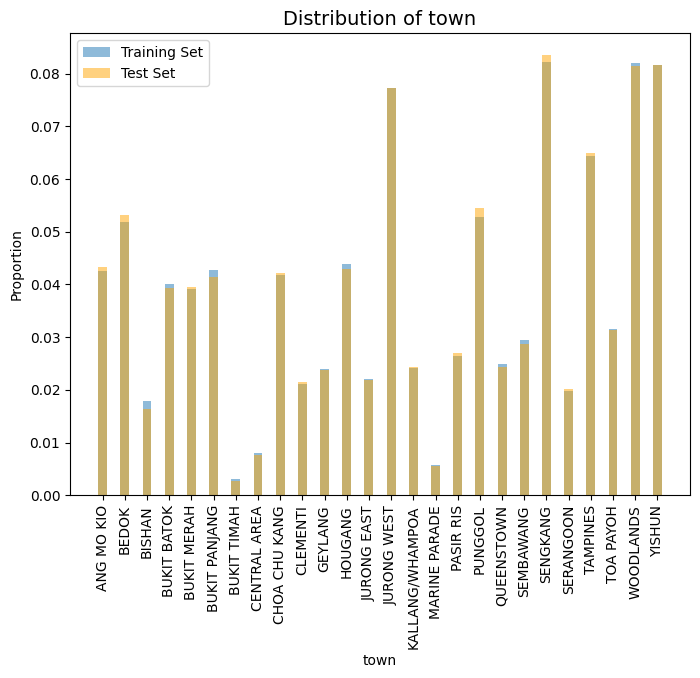

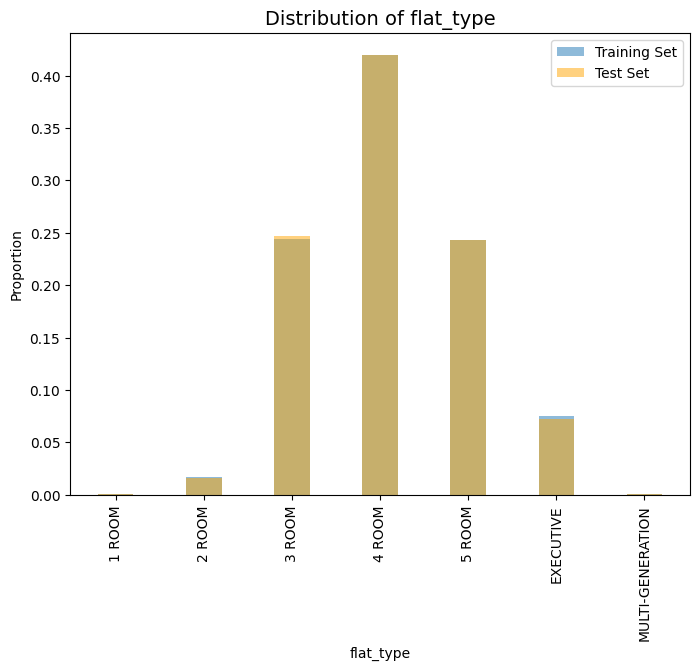

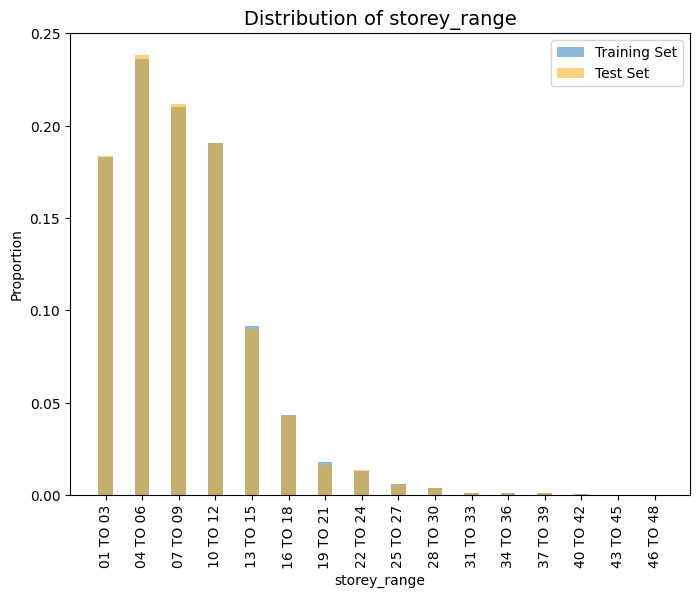

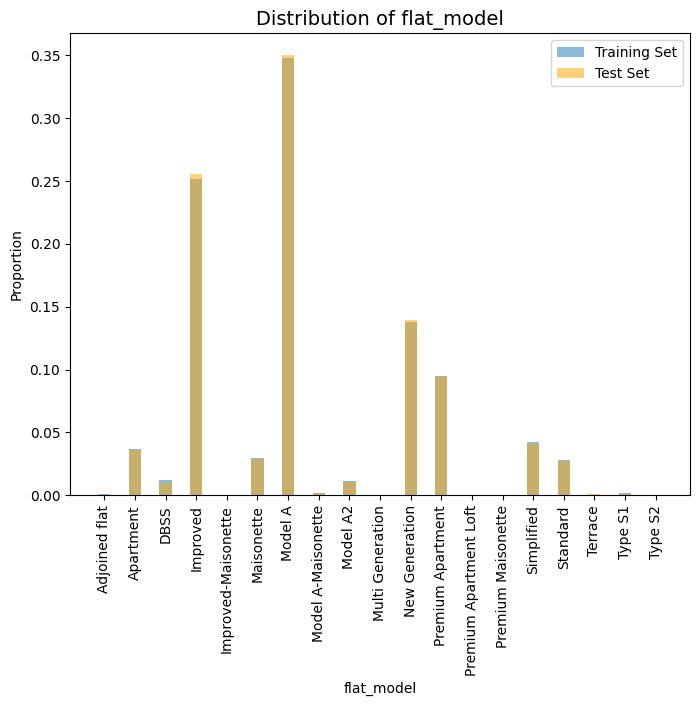

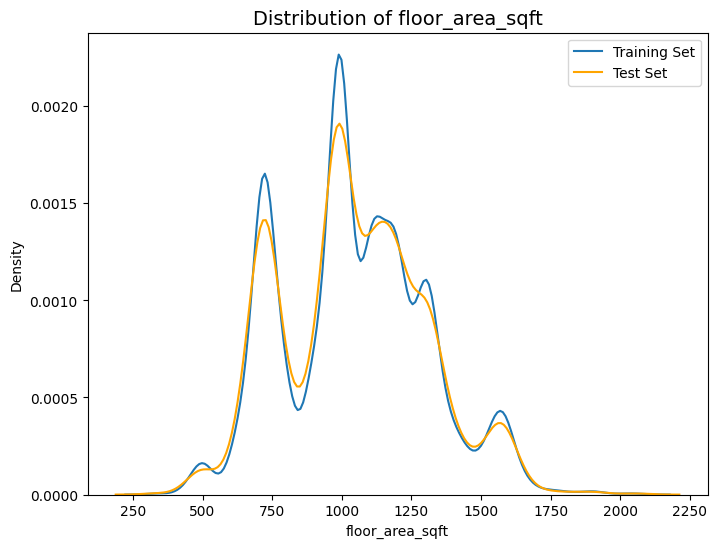

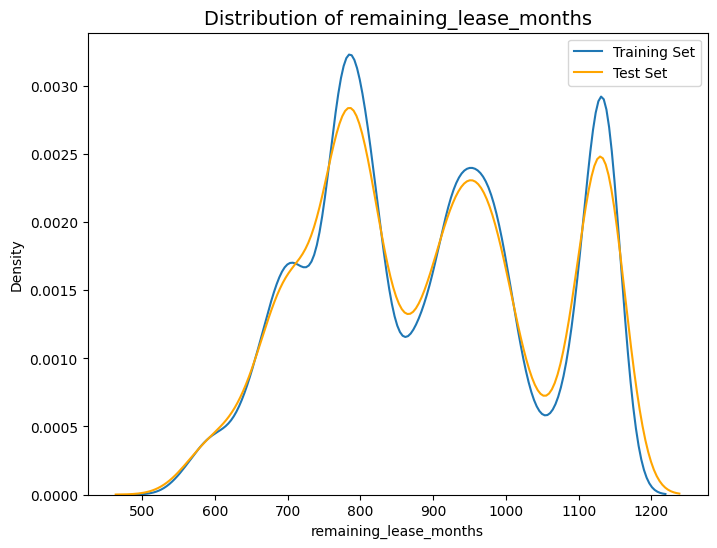

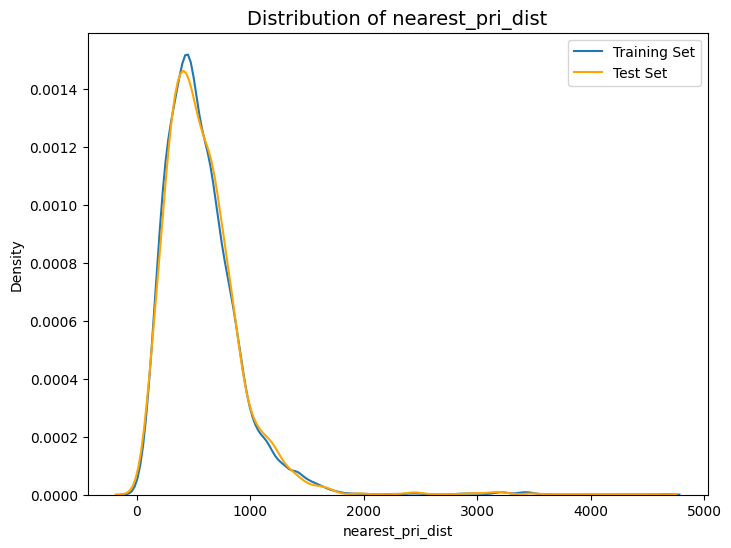

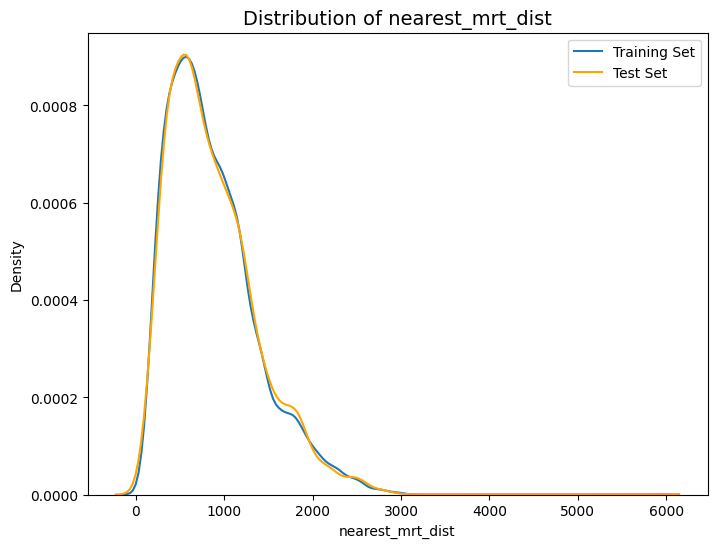

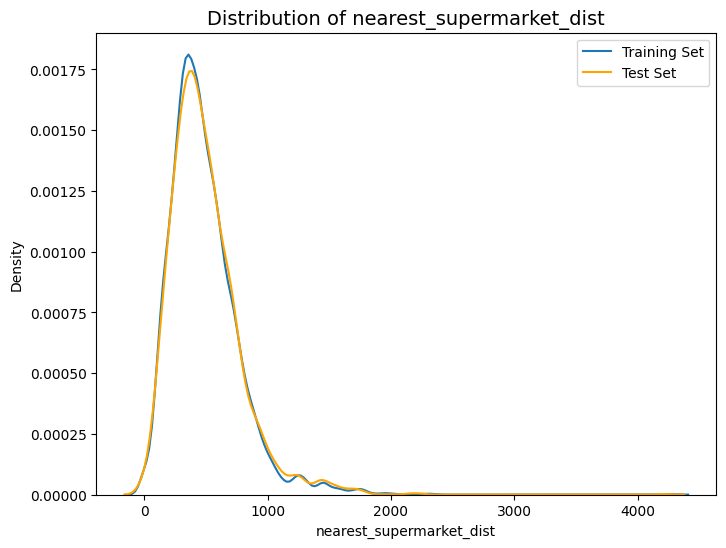

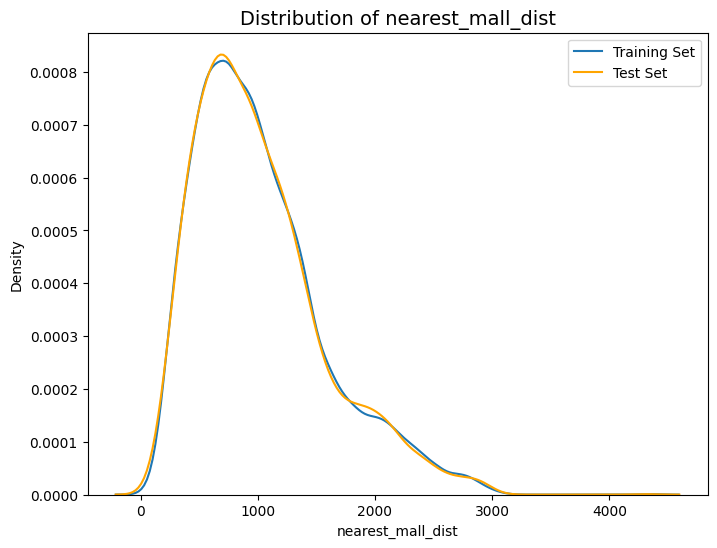

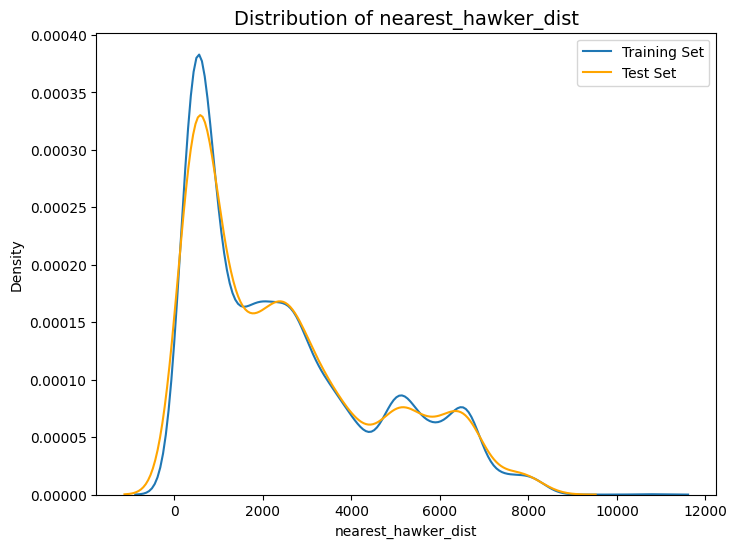

KL Divergence for Numerical Features:
floor_area_sqft: 0.0035045818547361027
remaining_lease_months: 0.029081305687225563
nearest_pri_dist: 0.0008230606578813108
nearest_mrt_dist: 0.0006631964171547229
nearest_supermarket_dist: 0.0006963899685553322
nearest_mall_dist: 0.00037308281535916886
nearest_hawker_dist: 0.001849377641902938
KL Divergence for Target Variable (price_per_sqft): 0.001696517442430281


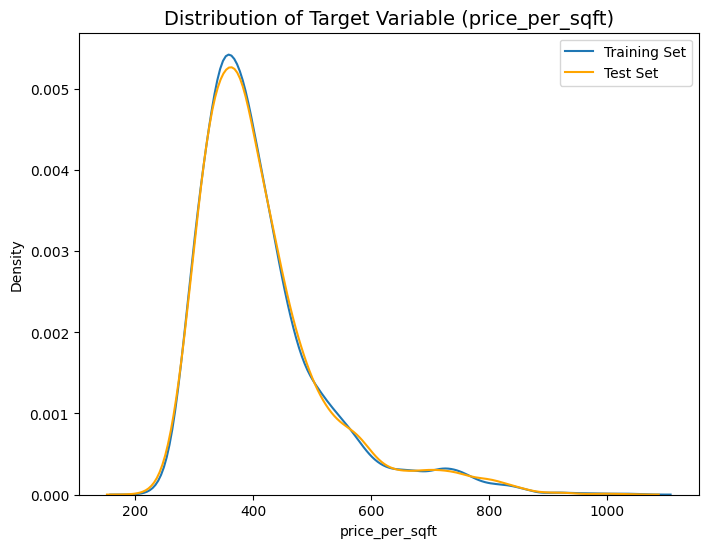

In [29]:
# Stratified by all categorical feature using train test split with stratify

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

# Load your dataset (assuming 'resale_flat_prices.csv' contains your data)
df = pd.read_csv('resale_flat_prices.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['price_per_sqft']) 
y = df['price_per_sqft']

# Combine categorical features into a single column for stratification
categorical_features = X.select_dtypes(include=['object'])
X['stratify'] = categorical_features.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# Filter out rare categories
stratify_counts = X['stratify'].value_counts()
rare_categories = stratify_counts[stratify_counts < 2].index
X = X[~X['stratify'].isin(rare_categories)]
y = y[X.index]

# Split the dataset into 80% training and 20% test with stratification
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['stratify']), y, test_size=0.2, random_state=0, stratify=X['stratify'])

# Visualize categorical feature distributions
for col in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    
    # Get value counts for training and test sets, aligning categories
    train_counts = X_train[col].value_counts(normalize=True).sort_index()
    test_counts = X_test[col].value_counts(normalize=True).sort_index()
    
    combined_index = train_counts.index.union(test_counts.index)
    train_counts = train_counts.reindex(combined_index, fill_value=0)
    test_counts = test_counts.reindex(combined_index, fill_value=0)
    
    width = 0.4  # Width for the bars

    # Plot the bars for training and test sets
    plt.bar(train_counts.index, train_counts, width=width, alpha=0.5, label='Training Set')
    plt.bar(test_counts.index, test_counts, width=width, alpha=0.5, label='Test Set', color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.show()


def calculate_kl_divergence(pdf_train, pdf_test, epsilon=1e-10):
    """Calculates KL divergence with smoothing to avoid division by zero."""
    pdf_train = np.maximum(pdf_train, epsilon)  # Add a small value to avoid zero
    pdf_test = np.maximum(pdf_test, epsilon)   # Add a small value to avoid zero
    kl_divergence = np.sum(pdf_train * np.log(pdf_train / pdf_test))
    return kl_divergence

# Visualize numerical feature distributions using KDE plots and calculate KL divergence
numerical_features = X_train.select_dtypes(include=['number']).columns
kl_divergences = {}

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    
    # Plot KDE for training and test sets
    sns.kdeplot(X_train[col], label='Training Set', fill=False)
    sns.kdeplot(X_test[col], label='Test Set', fill=False, color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    
    # Estimate PDF using KDE for y_train and y_test
    kde_train = gaussian_kde(X_train[col])
    kde_test = gaussian_kde(X_test[col])

    # Define the range of values for the PDF
    x_values = np.linspace(min(X_train[col].min(), X_test[col].min()), max(X_train[col].max(), X_test[col].max()), 1000)

    # Evaluate PDF at the defined points
    pdf_train = kde_train(x_values)
    pdf_test = kde_test(x_values)
    
    # Calculate KL divergence
    kl_divergence = calculate_kl_divergence(pdf_train, pdf_test)
    kl_divergences[col] = kl_divergence

# Report KL divergence values
print("KL Divergence for Numerical Features:")
for feature, kl_value in kl_divergences.items():
    print(f"{feature}: {kl_value}")


# Estimate PDF using KDE for target variable y_train and y_test
kde_train_y = gaussian_kde(y_train)
kde_test_y = gaussian_kde(y_test)

# Evaluate PDF at the defined points for target variable
x_values_y = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 1000)
pdf_train_y = kde_train_y(x_values_y)
pdf_test_y = kde_test_y(x_values_y)

# Calculate KL divergence for target variable
kl_divergence_y = calculate_kl_divergence(pdf_train_y, pdf_test_y)
print("KL Divergence for Target Variable (price_per_sqft):", kl_divergence_y)

# Visualize target variable distribution using KDE plots
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train, label='Training Set', fill=False)
sns.kdeplot(y_test, label='Test Set', fill=False, color='orange')

plt.title("Distribution of Target Variable (price_per_sqft)", fontsize=14)
plt.xlabel("price_per_sqft")
plt.ylabel("Density")
plt.legend()
plt.show()


In [30]:
# custom train test split for both numerical and categorical

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from scipy.stats import gaussian_kde
from pandas.api.types import is_numeric_dtype


def custom_train_test_split(X, y, test_size=0.2, random_state=None, n_bins=4):
    """
    Splits a dataset into training and test sets, stratifying by both categorical
    and numerical features.

    Args:
        X: Features (Pandas DataFrame).
        y: Target variable (Pandas Series or numpy array).
        test_size: Proportion of data to allocate to the test set (float).
        random_state: Seed for random number generator (int).
        n_bins: Number of bins to use for numerical feature discretization (int).

    Returns:
        X_train, X_test, y_train, y_test: Split datasets.
    """
    
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(include=['number']).columns

    # Combine categorical features into a single column for stratification
    X_strat = X[categorical_cols].astype(str)
    X_strat['combined_cat'] = X_strat.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

    # Discretize numerical features
    X_discretized = pd.DataFrame(index=X.index) 
    for col in numerical_cols:
        X_discretized[col] = pd.cut(X[col], bins=n_bins, labels=False)

    # Combine all features into a single column for stratification
    X_strat = pd.concat([X_strat, X_discretized], axis=1).astype(str)
    X_strat['combined_stratify'] = X_strat.apply(
        lambda row: '_'.join(row.values), axis=1
    )

    # Remove rare combined categories
    stratify_counts = X_strat['combined_stratify'].value_counts()
    rare_categories = stratify_counts[stratify_counts < 2].index
    valid_indices = ~X_strat['combined_stratify'].isin(rare_categories)

    # Perform stratified split
    splitter = StratifiedShuffleSplit(
        n_splits=1, test_size=test_size, random_state=random_state
    )
    train_idx, test_idx = next(splitter.split(X.loc[valid_indices], X_strat['combined_stratify'][valid_indices]))

    return (
        X.iloc[train_idx],
        X.iloc[test_idx],
        y.iloc[train_idx],
        y.iloc[test_idx],
        categorical_cols
    )

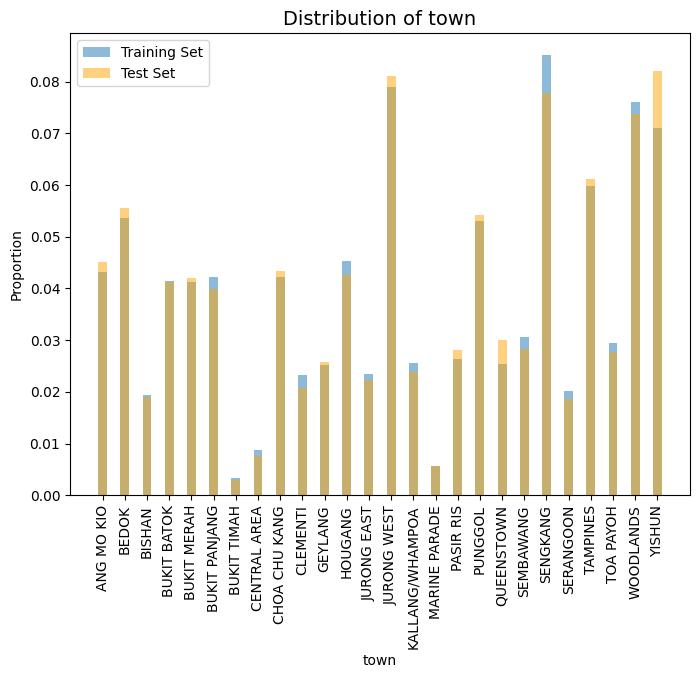

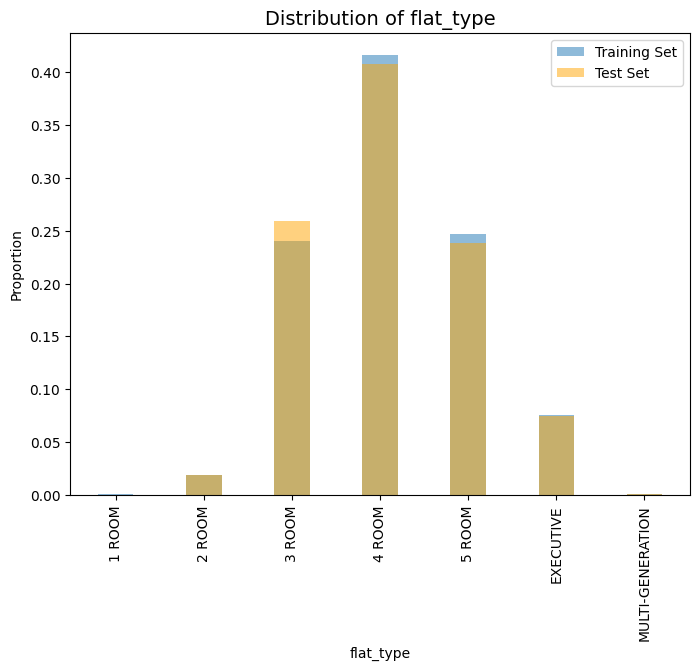

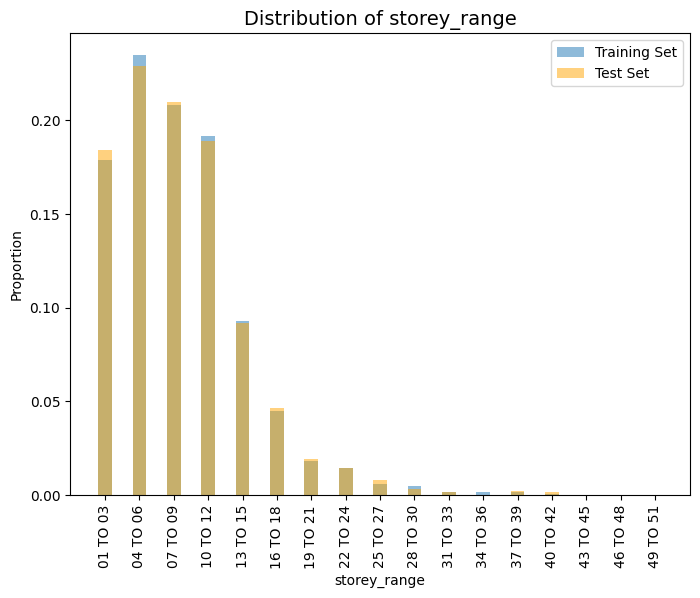

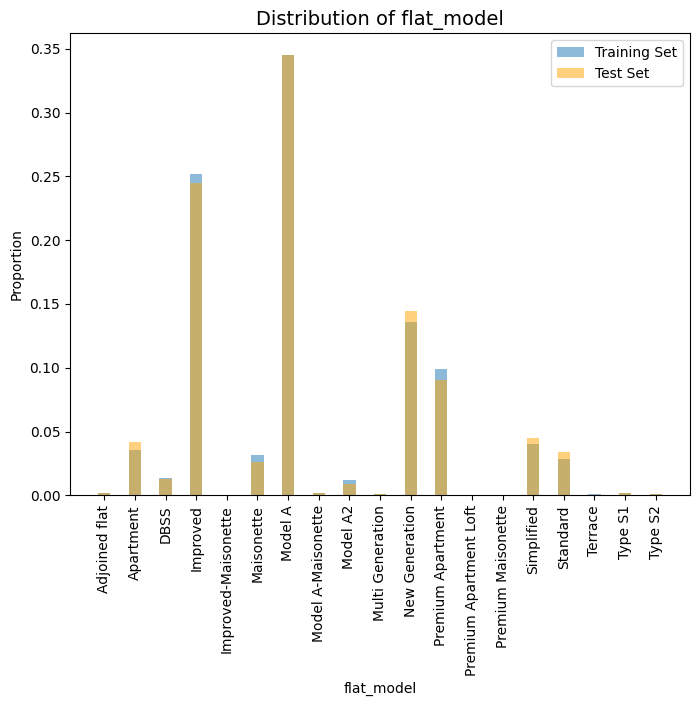

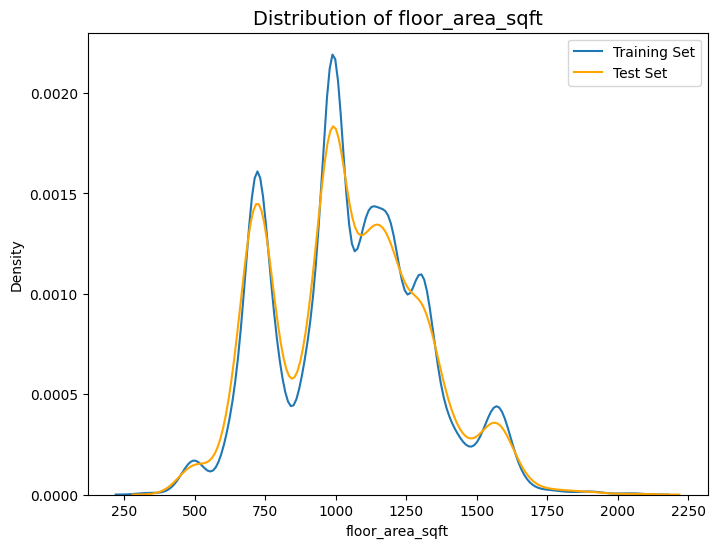

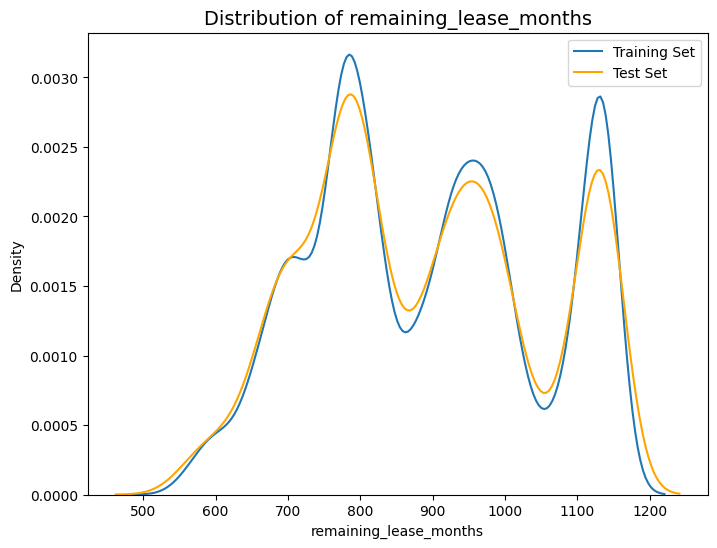

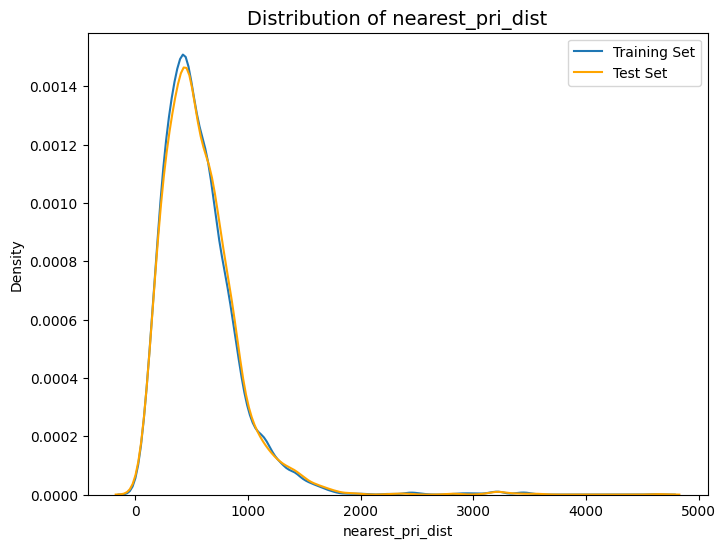

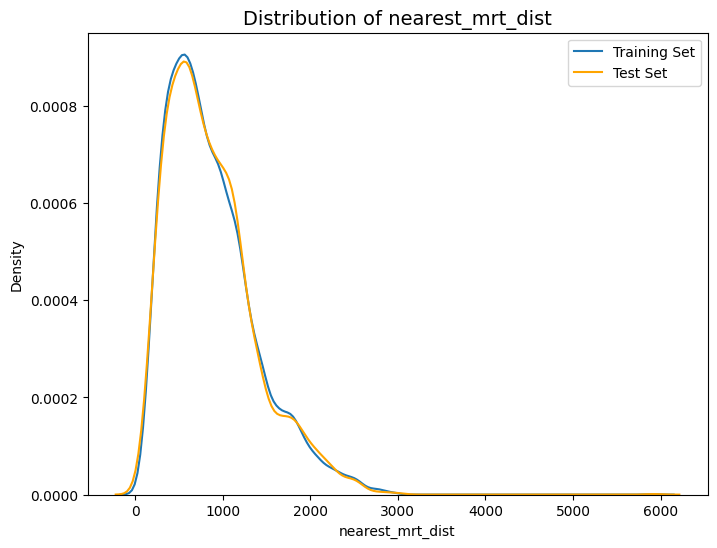

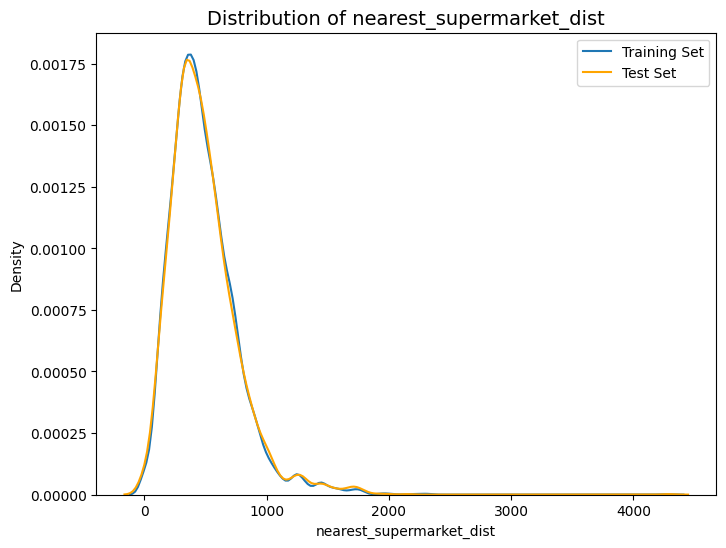

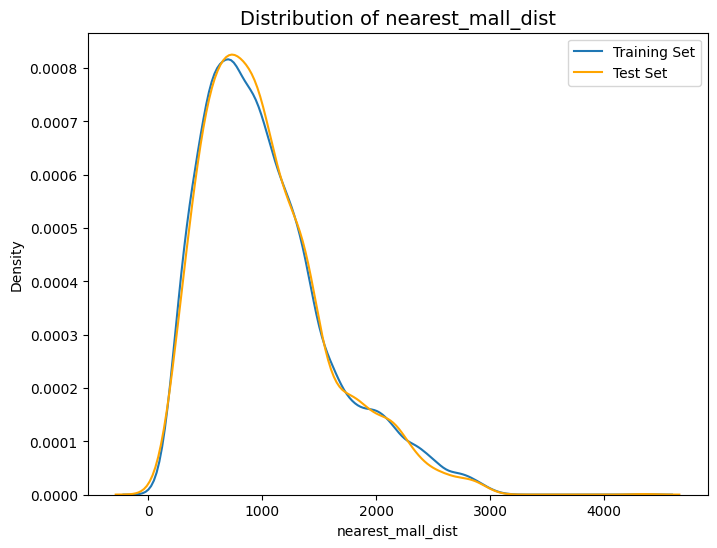

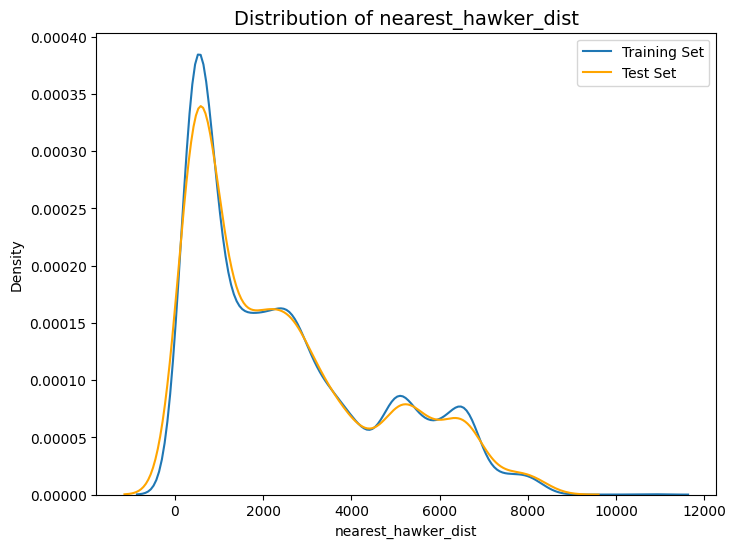

KL Divergence for Numerical Features:
floor_area_sqft: 0.004452604566960679
remaining_lease_months: 0.02892785688632981
nearest_pri_dist: 0.0008192631055647392
nearest_mrt_dist: 0.0007443130642878083
nearest_supermarket_dist: 0.0009919747228428503
nearest_mall_dist: 0.0006250354095402548
nearest_hawker_dist: 0.001986435569775944
KL Divergence for Target Variable (price_per_sqft): 0.0033001614097350456


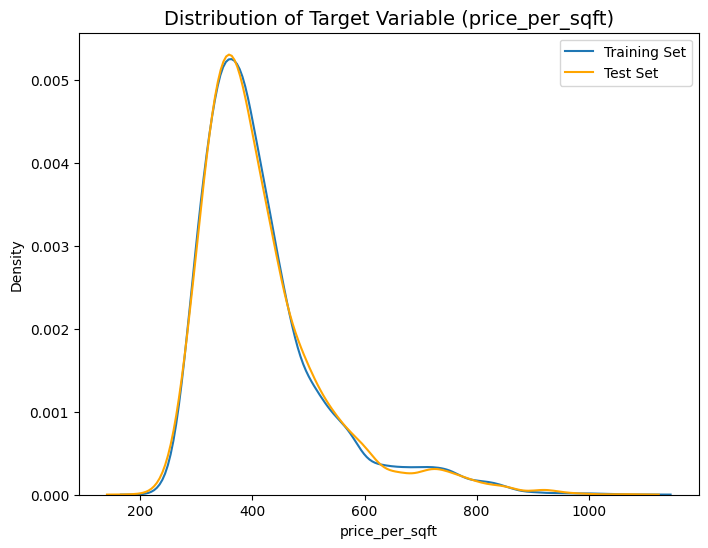

In [32]:
# custom train test split for both numerical and categorical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

# Load your dataset (assuming 'resale_flat_prices.csv' contains your data)
df = pd.read_csv('resale_flat_prices.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['price_per_sqft']) 
y = df['price_per_sqft']

# # Combine categorical features into a single column for stratification
# categorical_features = X.select_dtypes(include=['object'])
# X['stratify'] = categorical_features.apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

# # Filter out rare categories
# stratify_counts = X['stratify'].value_counts()
# rare_categories = stratify_counts[stratify_counts < 2].index
# X = X[~X['stratify'].isin(rare_categories)]
# y = y[X.index]

# Split the dataset into 80% training and 20% test with stratification
X_train, X_test, y_train, y_test, categorical_cols = custom_train_test_split(X, y, test_size=0.2, random_state=0)

# Visualize categorical feature distributions
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    
    # Get value counts for training and test sets, aligning categories
    train_counts = X_train[col].value_counts(normalize=True).sort_index()
    test_counts = X_test[col].value_counts(normalize=True).sort_index()
    
    combined_index = train_counts.index.union(test_counts.index)
    train_counts = train_counts.reindex(combined_index, fill_value=0)
    test_counts = test_counts.reindex(combined_index, fill_value=0)
    
    width = 0.4  # Width for the bars

    # Plot the bars for training and test sets
    plt.bar(train_counts.index, train_counts, width=width, alpha=0.5, label='Training Set')
    plt.bar(test_counts.index, test_counts, width=width, alpha=0.5, label='Test Set', color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.show()


# Function to calculate KL divergence
def calculate_kl_divergence(pdf_train, pdf_test, epsilon=1e-10):
    """Calculates KL divergence with smoothing to avoid division by zero."""
    pdf_train = np.maximum(pdf_train, epsilon)  # Add a small value to avoid zero
    pdf_test = np.maximum(pdf_test, epsilon)   # Add a small value to avoid zero
    kl_divergence = np.sum(pdf_train * np.log(pdf_train / pdf_test))
    return kl_divergence

# Visualize numerical feature distributions using KDE plots and calculate KL divergence
numerical_features = X_train.select_dtypes(include=['number']).columns
kl_divergences = {}

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    
    # Plot KDE for training and test sets
    sns.kdeplot(X_train[col], label='Training Set', fill=False)
    sns.kdeplot(X_test[col], label='Test Set', fill=False, color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    
    # Estimate PDF using KDE for y_train and y_test
    kde_train = gaussian_kde(X_train[col])
    kde_test = gaussian_kde(X_test[col])

    # Define the range of values for the PDF
    x_values = np.linspace(min(X_train[col].min(), X_test[col].min()), max(X_train[col].max(), X_test[col].max()), 1000)

    # Evaluate PDF at the defined points
    pdf_train = kde_train(x_values)
    pdf_test = kde_test(x_values)
    
    # Calculate KL divergence
    kl_divergence = calculate_kl_divergence(pdf_train, pdf_test)
    kl_divergences[col] = kl_divergence

# Report KL divergence values
print("KL Divergence for Numerical Features:")
for feature, kl_value in kl_divergences.items():
    print(f"{feature}: {kl_value}")


# Estimate PDF using KDE for target variable y_train and y_test
kde_train_y = gaussian_kde(y_train)
kde_test_y = gaussian_kde(y_test)

# Evaluate PDF at the defined points for target variable
x_values_y = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 1000)
pdf_train_y = kde_train_y(x_values_y)
pdf_test_y = kde_test_y(x_values_y)

# Calculate KL divergence for target variable
kl_divergence_y = calculate_kl_divergence(pdf_train_y, pdf_test_y)
print("KL Divergence for Target Variable (price_per_sqft):", kl_divergence_y)

# Visualize target variable distribution using KDE plots
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train, label='Training Set', fill=False)
sns.kdeplot(y_test, label='Test Set', fill=False, color='orange')

plt.title("Distribution of Target Variable (price_per_sqft)", fontsize=14)
plt.xlabel("price_per_sqft")
plt.ylabel("Density")
plt.legend()
plt.show()


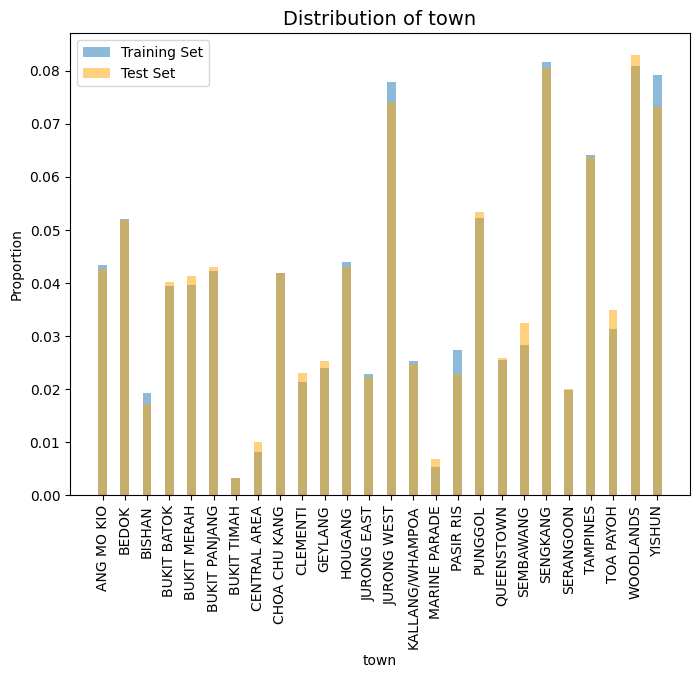

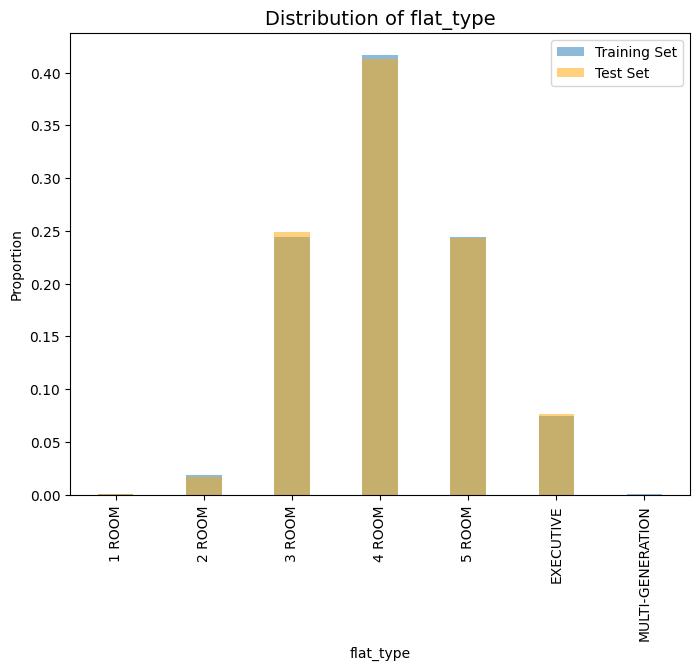

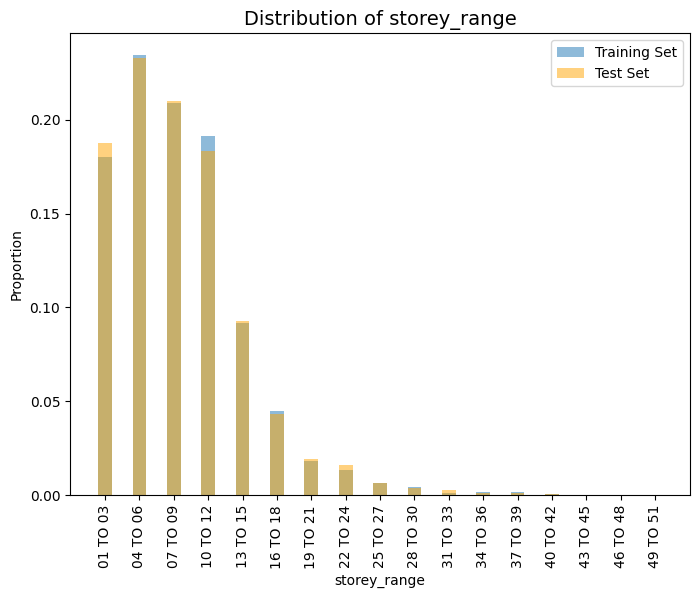

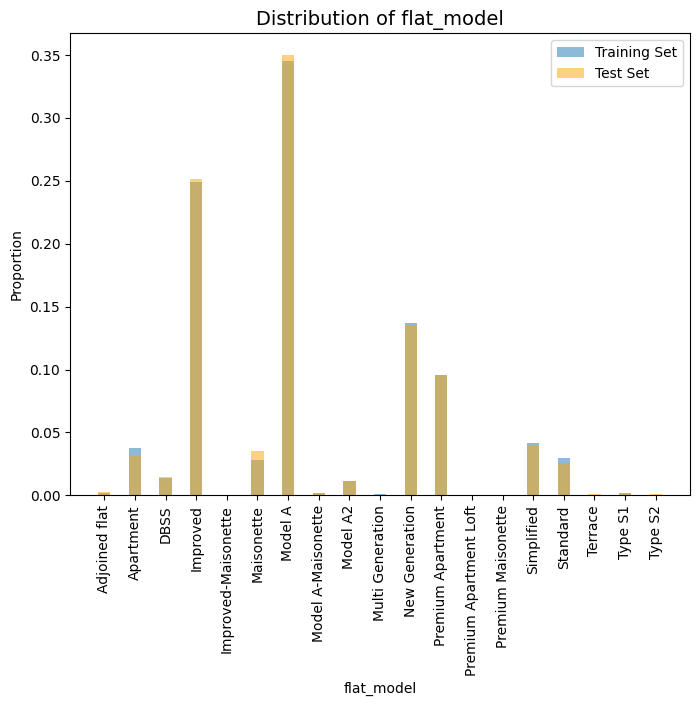

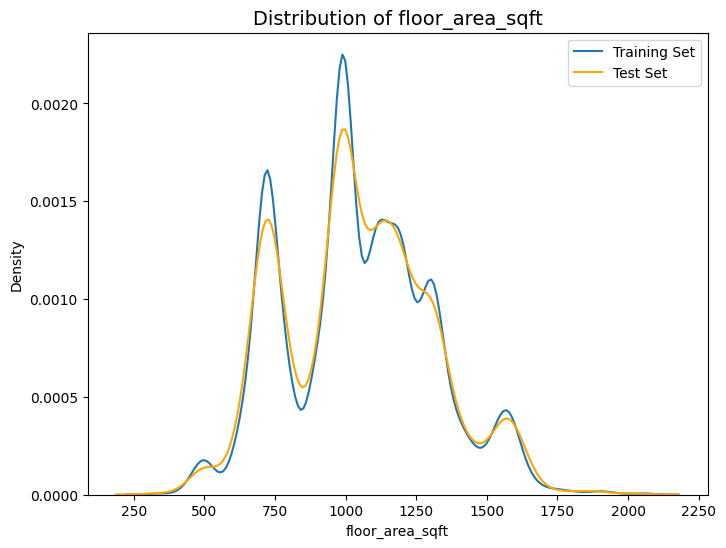

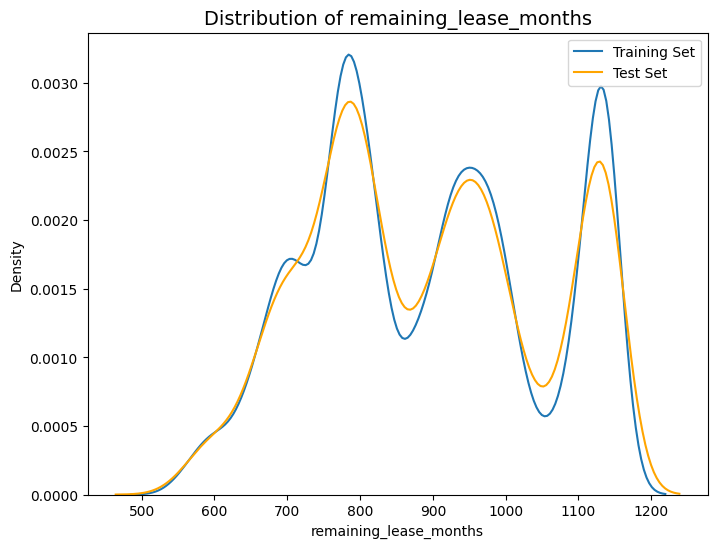

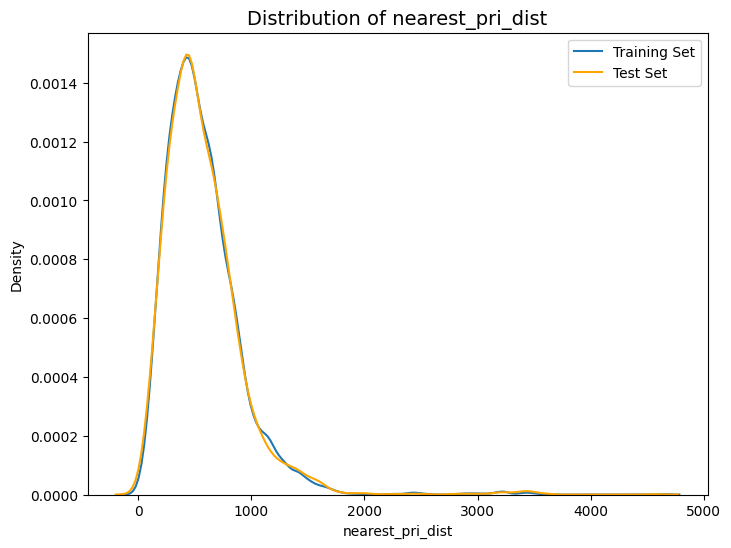

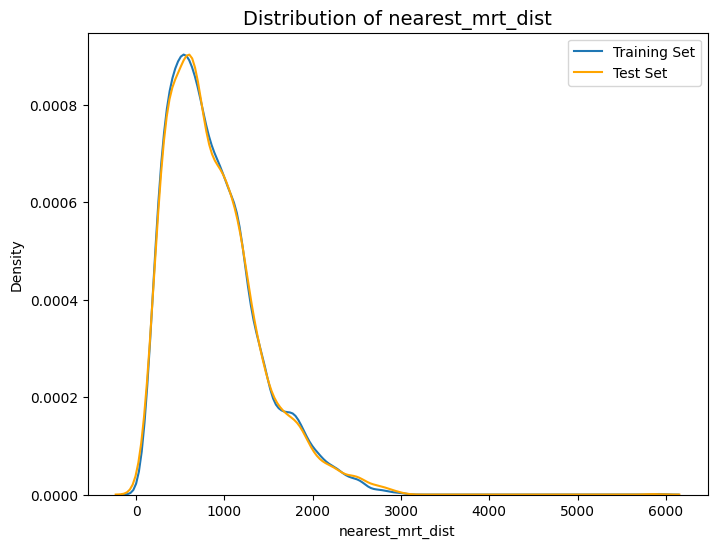

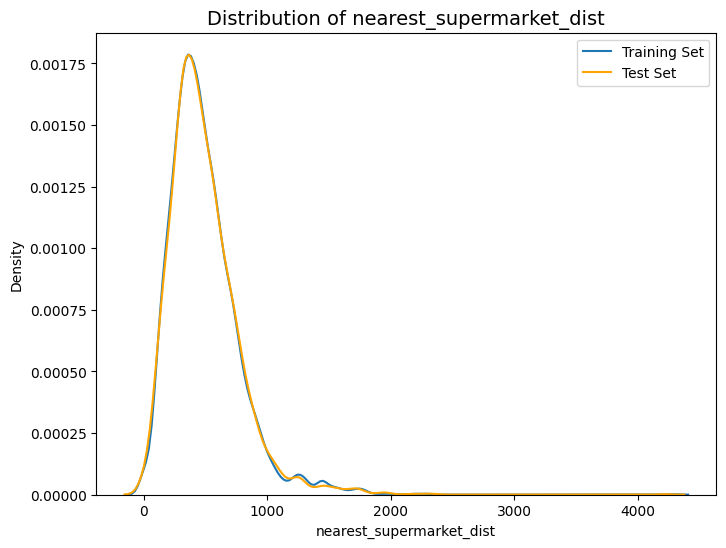

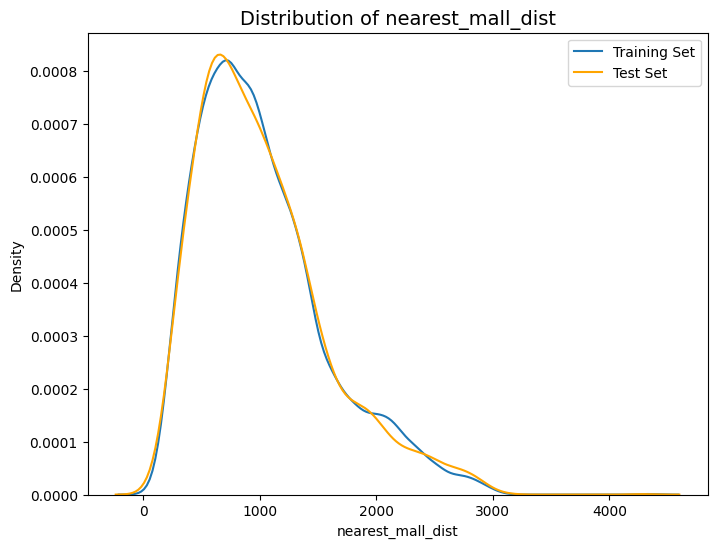

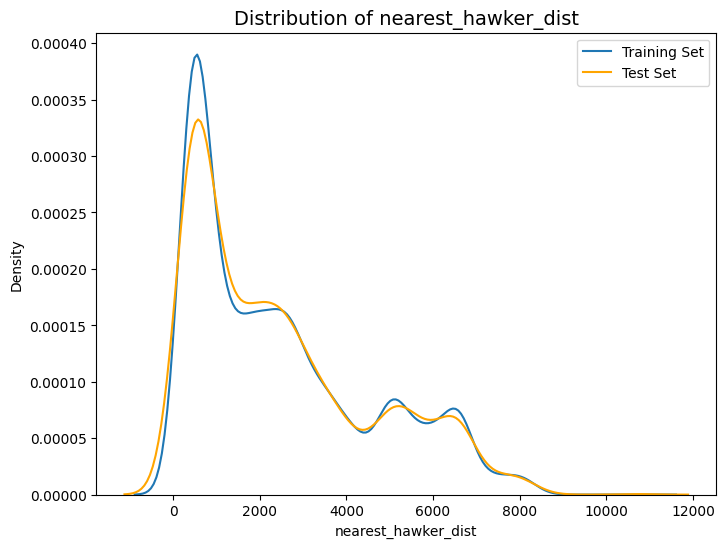

KL Divergence for Numerical Features:
floor_area_sqft: 0.003851442632431953
remaining_lease_months: 0.025848516789482114
nearest_pri_dist: 0.000924990470145772
nearest_mrt_dist: 0.0006385107884179332
nearest_supermarket_dist: 0.00048822036237923777
nearest_mall_dist: 0.0007217598500245956
nearest_hawker_dist: 0.0017543924898380376
KL Divergence for Target Variable (price_per_sqft): 0.00314724970804248


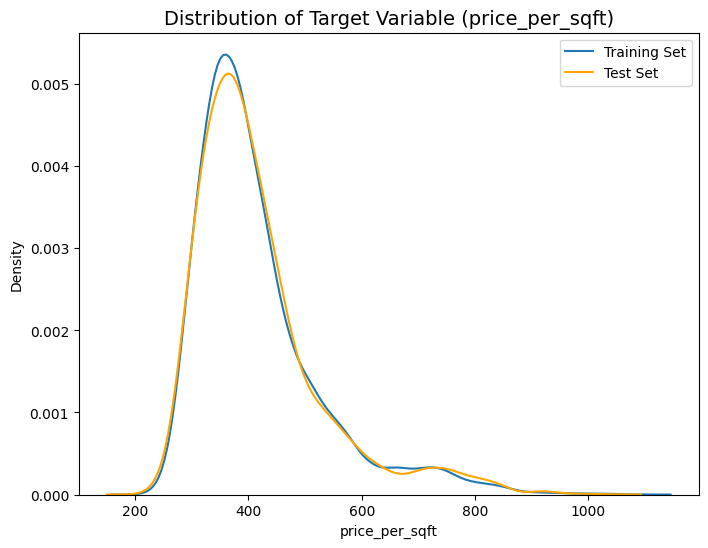

In [34]:
# train test split stratified by numerical variables via discretization of numerical features through binning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from scipy.stats import gaussian_kde
from pandas.api.types import is_numeric_dtype

# Load your dataset (assuming 'resale_flat_prices.csv' contains your data)
df = pd.read_csv('resale_flat_prices.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['price_per_sqft'])
y = df['price_per_sqft']

def numeric_train_test_split(X, y, test_size=0.2, random_state=None, n_bins=5):
    """
    Splits a dataset into training and test sets, stratifying ONLY by discretized numerical features.

    Args:
        X: Features (Pandas DataFrame).
        y: Target variable (Pandas Series or numpy array).
        test_size: Proportion of data to allocate to the test set (float).
        random_state: Seed for random number generator (int).
        n_bins: Number of bins to use for numerical feature discretization (int).

    Returns:
        X_train, X_test, y_train, y_test: Split datasets.
    """

    # Identify numerical columns
    numerical_cols = X.select_dtypes(include=['number']).columns

    # Discretize numerical features
    X_discretized = pd.DataFrame(index=X.index)
    for col in numerical_cols:
        X_discretized[col] = pd.cut(X[col], bins=n_bins, labels=False)

    # Combine all binned numerical features into a single column for stratification
    X_discretized['combined_num_stratify'] = X_discretized.apply(
        lambda row: '_'.join(row.values.astype(str)), axis=1
    )

    # Remove rare combined categories
    stratify_counts = X_discretized['combined_num_stratify'].value_counts()
    rare_categories = stratify_counts[stratify_counts < 2].index
    valid_indices = ~X_discretized['combined_num_stratify'].isin(rare_categories)

    # Perform stratified split on the binned numerical features
    splitter = StratifiedShuffleSplit(
        n_splits=1, test_size=test_size, random_state=random_state
    )
    train_idx, test_idx = next(splitter.split(X.loc[valid_indices], X_discretized['combined_num_stratify'][valid_indices]))

    return (
        X.iloc[train_idx],
        X.iloc[test_idx],
        y.iloc[train_idx],
        y.iloc[test_idx]
    )
# Split the dataset into 80% training and 20% test with stratification
X_train, X_test, y_train, y_test = numeric_train_test_split(X, y, test_size=0.2, random_state=0)


# Visualize categorical feature distributions
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    
    # Get value counts for training and test sets, aligning categories
    train_counts = X_train[col].value_counts(normalize=True).sort_index()
    test_counts = X_test[col].value_counts(normalize=True).sort_index()
    
    combined_index = train_counts.index.union(test_counts.index)
    train_counts = train_counts.reindex(combined_index, fill_value=0)
    test_counts = test_counts.reindex(combined_index, fill_value=0)
    
    width = 0.4  # Width for the bars

    # Plot the bars for training and test sets
    plt.bar(train_counts.index, train_counts, width=width, alpha=0.5, label='Training Set')
    plt.bar(test_counts.index, test_counts, width=width, alpha=0.5, label='Test Set', color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.show()


# Function to calculate KL divergence
def calculate_kl_divergence(pdf_train, pdf_test, epsilon=1e-10):
    """Calculates KL divergence with smoothing to avoid division by zero."""
    pdf_train = np.maximum(pdf_train, epsilon)  # Add a small value to avoid zero
    pdf_test = np.maximum(pdf_test, epsilon)   # Add a small value to avoid zero
    kl_divergence = np.sum(pdf_train * np.log(pdf_train / pdf_test))
    return kl_divergence

# Visualize numerical feature distributions using KDE plots and calculate KL divergence
numerical_features = X_train.select_dtypes(include=['number']).columns
kl_divergences = {}

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    
    # Plot KDE for training and test sets
    sns.kdeplot(X_train[col], label='Training Set', fill=False)
    sns.kdeplot(X_test[col], label='Test Set', fill=False, color='orange')
    
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    
    # Estimate PDF using KDE for y_train and y_test
    kde_train = gaussian_kde(X_train[col])
    kde_test = gaussian_kde(X_test[col])

    # Define the range of values for the PDF
    x_values = np.linspace(min(X_train[col].min(), X_test[col].min()), max(X_train[col].max(), X_test[col].max()), 1000)

    # Evaluate PDF at the defined points
    pdf_train = kde_train(x_values)
    pdf_test = kde_test(x_values)
    
    # Calculate KL divergence
    kl_divergence = calculate_kl_divergence(pdf_train, pdf_test)
    kl_divergences[col] = kl_divergence

# Report KL divergence values
print("KL Divergence for Numerical Features:")
for feature, kl_value in kl_divergences.items():
    print(f"{feature}: {kl_value}")


# Estimate PDF using KDE for target variable y_train and y_test
kde_train_y = gaussian_kde(y_train)
kde_test_y = gaussian_kde(y_test)

# Evaluate PDF at the defined points for target variable
x_values_y = np.linspace(min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max()), 1000)
pdf_train_y = kde_train_y(x_values_y)
pdf_test_y = kde_test_y(x_values_y)

# Calculate KL divergence for target variable
kl_divergence_y = calculate_kl_divergence(pdf_train_y, pdf_test_y)
print("KL Divergence for Target Variable (price_per_sqft):", kl_divergence_y)

# Visualize target variable distribution using KDE plots
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train, label='Training Set', fill=False)
sns.kdeplot(y_test, label='Test Set', fill=False, color='orange')

plt.title("Distribution of Target Variable (price_per_sqft)", fontsize=14)
plt.xlabel("price_per_sqft")
plt.ylabel("Density")
plt.legend()
plt.show()


ALL trained on random state = 0 and test_size = 0.2

Default train test split without stratification
KL Divergence for Numerical Features:
floor_area_sqft: 0.004107968295853008
remaining_lease_months: 0.02723938405980809
nearest_pri_dist: 0.0012236792225853257
nearest_mrt_dist: 0.0008880725129158142
nearest_supermarket_dist: 0.0010465435178217005
nearest_mall_dist: 0.0010012686907633944
nearest_hawker_dist: 0.0018727990154203313
KL Divergence for Target Variable (price_per_sqft): 0.0031661955413586464

Original (stratified by categorical features)
KL Divergence for Numerical Features:
floor_area_sqft: 0.0035045818547361027
remaining_lease_months: 0.029081305687225563
nearest_pri_dist: 0.0008230606578813108
nearest_mrt_dist: 0.0006631964171547229
nearest_supermarket_dist: 0.0006963899685553322
nearest_mall_dist: 0.00037308281535916886
nearest_hawker_dist: 0.001849377641902938
KL Divergence for Target Variable (price_per_sqft): 0.001696517442430281

Custom Numerical AND Categorical Stratification
KL Divergence for Numerical Features:
floor_area_sqft: 0.004452604566960679
remaining_lease_months: 0.02892785688632981
nearest_pri_dist: 0.0008192631055647392
nearest_mrt_dist: 0.0007443130642878083
nearest_supermarket_dist: 0.0009919747228428503
nearest_mall_dist: 0.0006250354095402548
nearest_hawker_dist: 0.001986435569775944
KL Divergence for Target Variable (price_per_sqft): 0.0033001614097350456

Custom Numerical Stratification 5 bins
KL Divergence for Numerical Features:
floor_area_sqft: 0.003851442632431953
remaining_lease_months: 0.025848516789482114
nearest_pri_dist: 0.000924990470145772
nearest_mrt_dist: 0.0006385107884179332
nearest_supermarket_dist: 0.00048822036237923777
nearest_mall_dist: 0.0007217598500245956
nearest_hawker_dist: 0.0017543924898380376
KL Divergence for Target Variable (price_per_sqft): 0.00314724970804248


Custom Numerical for 10 bins
KL Divergence for Numerical Features:
floor_area_sqft: 0.0034265515947811895
remaining_lease_months: 0.028415182969684944
nearest_pri_dist: 0.0012419278833181433
nearest_mrt_dist: 0.0009337283770347423
nearest_supermarket_dist: 0.0009559712002904083
nearest_mall_dist: 0.0007754991189489395
nearest_hawker_dist: 0.0018317452516381178
KL Divergence for Target Variable (price_per_sqft): 0.0037542387100011603


In [39]:
# default train test split vs custom numerical split across 100 epochs
# Function to calculate KL divergence (with modification)
def calculate_kl_divergence(p_train, p_test, epsilon=1e-10):
    """Calculates KL divergence with smoothing to avoid division by zero."""
    p_train = np.maximum(p_train, epsilon)
    p_test = np.maximum(p_test, epsilon)
    kl_divergence = np.sum(p_train * np.log(p_train / p_test))
    return kl_divergence

# Number of random states to iterate through
n_random_states = 101

# Initialize dictionaries to store KL divergences for each method
kl_divergences_random = {col: [] for col in X.columns if is_numeric_dtype(X[col])}
kl_divergences_random['price_per_sqft'] = []
kl_divergences_stratified = {col: [] for col in X.columns if is_numeric_dtype(X[col])}
kl_divergences_stratified['price_per_sqft'] = []


for random_state in range(n_random_states):
    # ... (Your code for splitting data remains the same)

    # Iterate ONLY through numerical feature columns in X
    for col in numerical_cols: 
        # Calculate KL divergence for random split
        kde_train_random = gaussian_kde(X_train_random[col])
        kde_test_random = gaussian_kde(X_test_random[col])

        # Define the range of values for the PDF
        x_values_random = np.linspace(min(X_train_random[col].min(), X_test_random[col].min()), max(X_train_random[col].max(), X_test_random[col].max()), 1000)

        # Evaluate PDF at the defined points
        pdf_train_random = kde_train_random(x_values_random)
        pdf_test_random = kde_test_random(x_values_random)

        kl_divergence = calculate_kl_divergence(pdf_train_random, pdf_test_random)
        kl_divergences_random[col].append(kl_divergence)

        # Calculate KL divergence for stratified split 
        kde_train_stratified = gaussian_kde(X_train_stratified[col])
        kde_test_stratified = gaussian_kde(X_test_stratified[col])

        # Define the range of values for the PDF
        x_values_stratified = np.linspace(min(X_train_stratified[col].min(), X_test_stratified[col].min()), max(X_train_stratified[col].max(), X_test_stratified[col].max()), 1000)

        # Evaluate PDF at the defined points
        pdf_train_stratified = kde_train_stratified(x_values_stratified)
        pdf_test_stratified = kde_test_stratified(x_values_stratified)

        kl_divergence = calculate_kl_divergence(pdf_train_stratified, pdf_test_stratified)
        kl_divergences_stratified[col].append(kl_divergence)

    # Calculate KL divergence for target variable separately for both splits
    # Evaluate PDF for y_train_random and y_test_random
    x_values_y_random = np.linspace(min(y_train_random.min(), y_test_random.min()), max(y_train_random.max(), y_test_random.max()), 1000)
    pdf_train_random_y = gaussian_kde(y_train_random)(x_values_y_random)
    pdf_test_random_y = gaussian_kde(y_test_random)(x_values_y_random)
    kl_divergences_y_random.append(calculate_kl_divergence(pdf_train_random_y, pdf_test_random_y))
    
     # Evaluate PDF for y_train_stratified and y_test_stratified
    x_values_y_stratified = np.linspace(min(y_train_stratified.min(), y_test_stratified.min()), max(y_train_stratified.max(), y_test_stratified.max()), 1000)
    pdf_train_stratified_y = gaussian_kde(y_train_stratified)(x_values_y_stratified)
    pdf_test_stratified_y = gaussian_kde(y_test_stratified)(x_values_y_stratified)
    kl_divergences_y_stratified.append(calculate_kl_divergence(pdf_train_stratified_y, pdf_test_stratified_y))

# Calculate mean KL divergences for each column
mean_kl_divergences_random = {col: np.mean(kl_values) for col, kl_values in kl_divergences_random.items()}
mean_kl_divergences_stratified = {col: np.mean(kl_values) for col, kl_values in kl_divergences_stratified.items()}

# Add mean KL divergence for target variable 
mean_kl_divergences_random['price_per_sqft'] = np.mean(kl_divergences_y_random)
mean_kl_divergences_stratified['price_per_sqft'] = np.mean(kl_divergences_y_stratified)


# Compare results
print("Mean KL Divergence for Random Split:")
print(mean_kl_divergences_random)

print("\nMean KL Divergence for Stratified Split on Numerical Features:")
print(mean_kl_divergences_stratified)


# Calculate overall mean KL divergence for each split method
overall_mean_kl_random = np.mean(list(mean_kl_divergences_random.values()))
overall_mean_kl_stratified = np.mean(list(mean_kl_divergences_stratified.values()))

print("\nOverall Mean KL Divergence for Random Split:", overall_mean_kl_random)
print("Overall Mean KL Divergence for Stratified Split:", overall_mean_kl_stratified)



Mean KL Divergence for Random Split:
{'floor_area_sqft': 0.004107968295853008, 'remaining_lease_months': 0.02723938405980809, 'nearest_pri_dist': 0.0012236792225853257, 'nearest_mrt_dist': 0.0008880725129158139, 'nearest_supermarket_dist': 0.0010465435178217007, 'nearest_mall_dist': 0.001001268690763394, 'nearest_hawker_dist': 0.0018727990154203324, 'price_per_sqft': 0.0031661955413586477}

Mean KL Divergence for Stratified Split on Numerical Features:
{'floor_area_sqft': 0.0038514426324319537, 'remaining_lease_months': 0.02584851678948212, 'nearest_pri_dist': 0.0009249904701457718, 'nearest_mrt_dist': 0.0006385107884179334, 'nearest_supermarket_dist': 0.00048822036237923766, 'nearest_mall_dist': 0.0007217598500245956, 'nearest_hawker_dist': 0.0017543924898380371, 'price_per_sqft': 0.00314724970804248}

Overall Mean KL Divergence for Random Split: 0.005068238857065789
Overall Mean KL Divergence for Stratified Split: 0.004671885386345266


c:\Users\GIRAFFE\anaconda3\envs\27may\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\GIRAFFE\anaconda3\envs\27may\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Hypothesis Testing

Null Hypothesis (H0): There is no significant difference between the mean KL Divergence of stratified and random splits.

Alternative Hypothesis (H1): The mean KL Divergence of stratified split is significantly smaller than that of random split.

In [41]:
from scipy import stats

mean_kl_divergences_random_list = list(mean_kl_divergences_random.values())
mean_kl_divergences_stratified_list = list(mean_kl_divergences_stratified.values())

t_statistic, p_value = stats.ttest_rel(mean_kl_divergences_random_list, mean_kl_divergences_stratified_list)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


t-statistic: 2.602114312762709
p-value: 0.03531630235749299


p-value is less than 0.05 so we reject the null hypothesis and conclude that the mean KL Divergence of stratified split is smaller than that of random split (and therefore for numerical columns, the distribution of train and test dataset would be more similar)

(but even though it is statistically significant, the difference may not be large enough to actually be important)

(number of bins may also be a factor here, but it takes 20 minutes to run 100 seeds so)

In [53]:
# custom categorical + numerical split vs default random train test split

X_numeric = X.select_dtypes(include=np.number)
# Identify numerical columns and filter out low-variance columns
variance_threshold = 0.001  # You can adjust this threshold
high_variance_cols = X_numeric.columns[X_numeric.var() > variance_threshold]

# Function to calculate KL divergence (with modification)
def calculate_kl_divergence(p_train, p_test, epsilon=1e-10):
    """Calculates KL divergence with smoothing to avoid division by zero."""
    p_train = np.maximum(p_train, epsilon)
    p_test = np.maximum(p_test, epsilon)
    kl_divergence = np.sum(p_train * np.log(p_train / p_test))
    return kl_divergence

# Number of random states to iterate through
n_random_states = 101

# Initialize dictionaries to store KL divergences for each method
kl_divergences_random = {col: [] for col in high_variance_cols}
kl_divergences_custom_stratified = {col: [] for col in high_variance_cols}
kl_divergences_y_random = []
kl_divergences_y_custom_stratified = []

for random_state in range(n_random_states):
    # Random Split
    X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(
        X, y, test_size=0.2, random_state=random_state
    )

    # Custom Stratified Split
    X_train_custom_stratified, X_test_custom_stratified, y_train_custom_stratified, y_test_custom_stratified, _ = custom_train_test_split(
        X, y, test_size=0.2, random_state=random_state, n_bins=4
    )
    for col in high_variance_cols:
        for X_train, X_test, kl_divergences in [
            (X_train_random, X_test_random, kl_divergences_random),
            (X_train_custom_stratified, X_test_custom_stratified, kl_divergences_custom_stratified),
        ]:
            kde_train = gaussian_kde(X_train[col])
            kde_test = gaussian_kde(X_test[col])

            # Define the range of values for the PDF
            x_values = np.linspace(
                min(X_train[col].min(), X_test[col].min()),
                max(X_train[col].max(), X_test[col].max()),
                1000
            )
            # Evaluate PDF at the defined points
            pdf_train = kde_train(x_values)
            pdf_test = kde_test(x_values)

            kl_divergence = calculate_kl_divergence(pdf_train, pdf_test)
            kl_divergences[col].append(kl_divergence)

    # Calculate KL divergence for target variable for each split method
    for y_train, y_test, kl_divergences_y in [
        (y_train_random, y_test_random, kl_divergences_y_random),
        (y_train_custom_stratified, y_test_custom_stratified, kl_divergences_y_custom_stratified),
    ]:
        # Evaluate PDF
        x_values_y = np.linspace(
            min(y_train.min(), y_test.min()),
            max(y_train.max(), y_test.max()),
            1000
        )
        pdf_train_y = gaussian_kde(y_train)(x_values_y)
        pdf_test_y = gaussian_kde(y_test)(x_values_y)
        kl_divergence_y = calculate_kl_divergence(pdf_train_y, pdf_test_y)
        kl_divergences_y.append(kl_divergence_y)
    

# Calculate mean KL divergences for each column
mean_kl_divergences_random = {col: np.mean(kl_values) for col, kl_values in kl_divergences_random.items()}
mean_kl_divergences_custom_stratified = {col: np.mean(kl_values) for col, kl_values in kl_divergences_custom_stratified.items()}
mean_kl_divergences_y_random = np.mean(kl_divergences_y_random)
mean_kl_divergences_y_custom_stratified = np.mean(kl_divergences_y_custom_stratified)


print("Mean KL Divergence for Random Split:")
for col, kl_div in mean_kl_divergences_random.items():
    print(f"{col}: {kl_div}")
print(f"price_per_sqft: {mean_kl_divergences_y_random}")

print("\nMean KL Divergence for Stratified Split on Both Categorical and Numerical Features:")
for col, kl_div in mean_kl_divergences_custom_stratified.items():
    print(f"{col}: {kl_div}")
print(f"price_per_sqft: {mean_kl_divergences_y_custom_stratified}")



Mean KL Divergence for Random Split:
floor_area_sqft: 0.00427325986471831
remaining_lease_months: 0.027420911196968975
nearest_pri_dist: 0.0010300605702278655
nearest_mrt_dist: 0.0008137850748041267
nearest_supermarket_dist: 0.0009331881546320323
nearest_mall_dist: 0.0007176244691885421
nearest_hawker_dist: 0.001859721233820552
price_per_sqft: 0.0029818111306181305

Mean KL Divergence for Stratified Split on Both Categorical and Numerical Features:
floor_area_sqft: 0.004281659378620915
remaining_lease_months: 0.026265986962101726
nearest_pri_dist: 0.0011571170063452295
nearest_mrt_dist: 0.0008229996901581109
nearest_supermarket_dist: 0.0010989267594069506
nearest_mall_dist: 0.0007925236470932904
nearest_hawker_dist: 0.0019980711210393627
price_per_sqft: 0.0032867033457139247
